<a href="https://colab.research.google.com/github/helmana/DLeeg/blob/master/model%20layers%20pop/EER_FAR_FFR_verification(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
counter true and false verification

subject number = 109 >> 90 train subject  + 19 new subject 
channel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]

model3 -  1 layer pop

'''


'\ncounter true and false verification\n\nsubject number = 109 >> 90 train subject  + 19 new subject \nchannel number = 20 >> [21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]\n\nmodel3 -  1 layer pop\n\n'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install mne

     |████████████████████████████████| 6.4MB 2.7MB/s 


In [0]:
'''
Rivision:
980806:
  First version.
  
  

'''

'\nRivision:\n980806:\n  First version.\n  \n  \n\n'

In [0]:
# Parameters:

EpochNum=60
subject_numberT=109
RemoveBaseLine=0
Orthogonal=1
task_index = [1] # task: REO
list_channel=[21,23,29,31,33,35,36,40,8,10,12,41,46,48,50,52,54,60,61,62]
TryStr='Try1'
seed = 14

task_number=1
task_time = 60
sampel_number_per_sec =  160 # sampel rate
total_sampel_number =  sampel_number_per_sec *task_time # 60*160
#sample_shift = 4 #step len
inner_sample_shift = 4 # inner step len
outer_sample_shift =8  # outer step len
window_len= 20
batch_size=64




In [6]:
# For Visualization
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

# General use
import itertools
from itertools import combinations 

import os.path
from scipy.spatial import distance
import numpy as np
import math
import random
import datetime
import time
import pytz
from time import gmtime, strftime

# For model training
from keras import layers
from keras import models
from keras import regularizers
from keras.utils import to_categorical
from keras import optimizers
from keras import backend as KerasBackend
from keras.models import load_model



# EEG Tools
import mne
from mne.preprocessing import create_ecg_epochs, create_eog_epochs
from mne import io
from mne import viz
from mne import Epochs, io, pick_types
from mne.event import define_target_events
from mne.time_frequency import psd_welch
print(__doc__)



Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/numba/decorators.py:146: RuntimeWarning: Caching is not available when the 'parallel' target is in use. Caching is now being disabled to allow execution to continue.
  warnings.warn(msg, RuntimeWarning)


Automatically created module for IPython interactive environment


In [7]:
# load dataset in array
task_number= len(task_index)

# load dataset in array
list_raw_fnames = [[0]*task_number]*subject_numberT
for x in range(subject_numberT):
  list_raw_fnames[x] = mne.datasets.eegbci.load_data(x+1,task_index,path='/content/drive/My Drive/Deep Results/Database')

list_rawdata = np.zeros((subject_numberT,task_number), dtype='object')

for i in range(subject_numberT):
  for j in range(task_number):
    list_rawdata[i][j] = mne.io.read_raw_edf(list_raw_fnames[i][j], preload=True)


Do you want to set the path:
    /content/drive/My Drive/Deep Results/Database
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S002/S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Extracting EDF parameters from /content/drive/My Drive/Deep Results/Database/MNE-eegbci-data/physiobank/database/eegmmidb/S003/S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.in

In [0]:
subject_number = 90
# new subject
new_subject =np.arange(subject_number, subject_numberT)

# img for each subject
subject_img_number = math.floor((total_sampel_number - sampel_number_per_sec - (window_len-1 )*inner_sample_shift) / outer_sample_shift) +1
np.random.seed(seed)  

subject_number_array_shuffled=np.arange(subject_number)
np.random.shuffle(subject_number_array_shuffled)

subject_img_number_array_shuffled=np.arange(subject_img_number)
np.random.shuffle(subject_img_number_array_shuffled)

train_index = len(subject_img_number_array_shuffled)//2
val_index = train_index + len(subject_img_number_array_shuffled)//4

train_shuff = subject_img_number_array_shuffled[:train_index]
val_shuff = subject_img_number_array_shuffled[train_index:val_index]
test_shuff = subject_img_number_array_shuffled[val_index:]


train_number = len(train_shuff)
val_number = len(val_shuff)
test_number = len(test_shuff)


In [0]:
def normalize_channel_data(ch , i, ch_min, ch_max):
  ch = ((ch - ch_min[i]) / (ch_max[i] - ch_min[i] ))
  return ch

def ProjectionVector(VecA,VecB):
    Projeted_VecB_on_VecA=np.dot(VecA,VecB)/np.dot(VecA,VecA)*VecA
    return Projeted_VecB_on_VecA

In [0]:
#################################################################################################
## Define General Data Generator
def GenerateGeneralData(BatchSize,ListRawDataMain,SubjectArrayShuffled,ListChannel,RemoveBaseLineFlag,OrthogonalFlag,ImageArrayShuffled,WindowLen,OuterSampleShift,InnerSampleShift,SampelNumberPerSec):
    
    Iter=0
    #ch_number=len(ListChannel)
    
    
    ##########################################################
    # Pre-Proceesing On Raw Data
    ListRawDataTemp=ListRawDataMain.copy()
    
    DataAllChannelsRawPerSubject, times =(ListRawDataTemp[0][0][:64,:9600])

    DataChannelsRaw   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsNormal=np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    DataChannelsOrt   =np.zeros((len(SubjectArrayShuffled),ch_number,times.size),dtype = float)
    e= 0    
    for s in SubjectArrayShuffled:

        DataAllChannelsRawPerSubject, times =(ListRawDataTemp[s][0][:64,:9600])
        
        # Extrac Channel T9 or T10 as Baseline
        DataChannelT9Raw =DataAllChannelsRawPerSubject[43]# Ch T9 (42) or T10 (43)


        ch_max =[]
        ch_min =[]
        # Extract Selected Channels+ Remove Baseline+ Normailze
        
        for i in range(len(ListChannel)):
            DataChannelsRaw[e][i]=DataAllChannelsRawPerSubject[ListChannel[i]].copy() -DataChannelT9Raw*RemoveBaseLineFlag

            ch_max = np.append(ch_max, max(DataChannelsRaw[e][i])) # max for each cannel
            ch_min = np.append(ch_min, min(DataChannelsRaw[e][i])) # min for each cannel

            DataChannelsNormal[e][i]=normalize_channel_data(DataChannelsRaw[e][i].copy(), i, ch_min, ch_max)
        e = e+1

        # Orthogonal Channel
        #DataChannelsOrt[e][0]=DataChannelsNormal[e][0]
        #DataChannelsOrt[e][1]=DataChannelsNormal[e][1]-ProjectionVector(DataChannelsNormal[e][0].copy(),DataChannelsNormal[e][1].copy())*OrthogonalFlag
        
        
        
    ##########################################################
    # Generate Data for Network
    while True:

      for j in ImageArrayShuffled:
          r = 0
          for s in SubjectArrayShuffled:

              if Iter ==0:
                  TrainImage=np.zeros((BatchSize, ch_number, WindowLen, SampelNumberPerSec), dtype = float)
                  TrainLabel=np.zeros((BatchSize),dtype=int)

              for i in range(len(ListChannel)):
                  for z in range (WindowLen):
                      ExtractedData = DataChannelsNormal[r][i][0+j*OuterSampleShift + z*InnerSampleShift:SampelNumberPerSec+ j*OuterSampleShift + z*InnerSampleShift]
                      TrainImage[Iter][i][z] = ExtractedData.copy()# Data
              r=r+1

              TrainLabel[Iter] = s # label

              Iter=Iter+1
              #Count=Count+1
              if Iter==BatchSize:
                Iter=0
                #print('Count=',Count)
                TrainLabelClass=to_categorical(TrainLabel,subject_numberT)
                TI = np.moveaxis(TrainImage, 1, -1)
                yield TI, TrainLabelClass 

                

In [0]:
ch_number=len(list_channel)
list_rawdataTemp=list_rawdata.copy()


In [0]:
#model.save('/content/drive/My Drive/mymodels/model1.h5')

In [12]:
model = load_model('/content/drive/My Drive/mymodels/model2_2.h5')
model.summary()
model.pop()
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 20, 160, 64)       11584     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 80, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 78, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 39, 128)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 37, 256)        295168    
____________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
batch_size = 1
def subject_Predict_generator(mymodel, subject_arr, img_arr ):
  sn = len(subject_arr)
  imgn = len(img_arr)
  pre_GenTestData=GenerateGeneralData(BatchSize=batch_size,
                                  ListRawDataMain=list_rawdataTemp.copy(),
                                  SubjectArrayShuffled= subject_arr,
                                  ListChannel=list_channel,
                                  RemoveBaseLineFlag=RemoveBaseLine,
                                  OrthogonalFlag=Orthogonal,
                                  WindowLen=window_len,
                                  OuterSampleShift=outer_sample_shift,
                                  InnerSampleShift=inner_sample_shift,
                                  SampelNumberPerSec=sampel_number_per_sec,
                                  ImageArrayShuffled= img_arr)

  pre_Subject = mymodel.predict_generator(pre_GenTestData,steps=np.ceil(imgn*sn/batch_size))
  return pre_Subject


In [0]:
def VerifySubject(threshold, s1, smp1, s2, smp2):
  vec1 = subject_Predict_generator(model, [s1], [smp1])
  vec2 = subject_Predict_generator(model, [s2], [smp2])
  #if comparisonType == 'same':
  if (distance.euclidean(vec1[0], vec2[0])) <threshold :
    return 0 # same
  else:
    return 1 # different


In [15]:

path = "/content/drive/My Drive/Verification Threshold"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Creation of the directory /content/drive/My Drive/Verification Threshold failed


In [0]:
list_threshold = []
list_FRR = []
list_FAR = []
list_Correct_Verifi_Percentage = []

def counter_true_false_result(start_index_s1, end_index_s1 ,start_index_s2, end_index_s2 ):
  threshold = 0
  data_number = 2000

  for i in range(25,40):

    threshold = i*2
    false_rejection = 0
    false_acceptance = 0
    Correct_Verifi_Percentage = 0
    true_result= 0
    false_result = 0

    for i in range(data_number):
      
      # subject 1
      S1_rand = random.randint(start_index_s1, end_index_s1)
      S1_Sample_rand1 = random.randint(0,subject_img_number-1)
      S1_Sample_rand2 = random.randint(0,subject_img_number-1)
      while S1_Sample_rand1 == S1_Sample_rand2:
        S1_Sample_rand2 = random.randint(0,subject_img_number-1)

      result1 = VerifySubject(threshold, S1_rand, S1_Sample_rand1, S1_rand, S1_Sample_rand2)
      
      if result1 == 0:
        true_result = true_result+1
      else:
        false_result = false_result+1
        false_rejection = false_rejection +1  #FRR

      # subject 2
      S2_rand = random.randint(start_index_s2, end_index_s2)
      while S2_rand == S1_rand:
        S2_rand = random.randint(start_index_s2, end_index_s2)

      S2_Sample_rand = random.randint(0,subject_img_number-1)
      result2 = VerifySubject(threshold, S1_rand, S1_Sample_rand1, S2_rand, S2_Sample_rand)

      if result2 == 1:
        true_result = true_result+1
      else: 
        false_result = false_result+1
        false_acceptance = false_acceptance+1  #FAR
      
      #print(result1 , result2)
    Correct_Verifi_Percentage = (true_result *100) / (true_result + false_result)
    list_threshold.append(threshold)
    list_FRR.append(false_rejection)
    list_FAR.append(false_acceptance)
    list_Correct_Verifi_Percentage.append(Correct_Verifi_Percentage)
    print(threshold, '\n', Correct_Verifi_Percentage,'\n', true_result, false_result,'\n', false_rejection,false_acceptance,'\n','\n' )

  ## Save in text file
  textFileName = "threshold_S1(" + str(start_index_s1)+ "-" + str(end_index_s1) + ")_S2("+ str(start_index_s2)+ "-" + str(end_index_s2) + ")" +".txt"
  completeName = os.path.join(path, textFileName )

  with open(completeName, 'w') as f:
    f.write( 'Correct Verifi Percentage & false rejection & false acceptance: '  + '\n')
    f.writelines(str(list_threshold[j])+". " + "vrifi %: "+ str(list_Correct_Verifi_Percentage[j])+ '\t' + "FRR: " + str(list_FRR[j]) + '\t' + "FAR: " + str(list_FAR[j]) + '\n' for j in range(len(list_Correct_Verifi_Percentage)) )


50 
 82.525 
 3301 699 
 696 3 
 

52 
 84.4 
 3376 624 
 611 13 
 

54 
 85.475 
 3419 581 
 564 17 
 

56 
 86.275 
 3451 549 
 519 30 
 

58 
 87.45 
 3498 502 
 468 34 
 

60 
 88.15 
 3526 474 
 425 49 
 

62 
 88.2 
 3528 472 
 405 67 
 

64 
 88.25 
 3530 470 
 392 78 
 

66 
 89.5 
 3580 420 
 311 109 
 

68 
 89.25 
 3570 430 
 305 125 
 

70 
 89.2 
 3568 432 
 268 164 
 

72 
 88.55 
 3542 458 
 255 203 
 

74 
 88.35 
 3534 466 
 228 238 
 

76 
 88.05 
 3522 478 
 214 264 
 

78 
 86.875 
 3475 525 
 212 313 
 



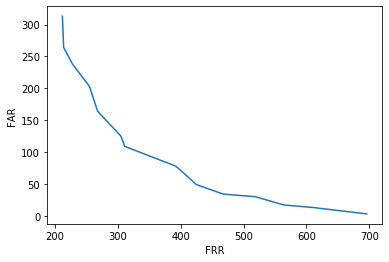

In [38]:
#1. train subject , train subject

counter_true_false_result(0,89, 0,89) 
plt.plot(list_FRR, list_FAR ) 
plt.xlabel('FRR') 
plt.ylabel('FAR') 
#plt.legend()
plt.show() 

50 
 82.075 
 3283 717 
 675 42 
 

52 
 84.125 
 3365 635 
 590 45 
 

54 
 84.475 
 3379 621 
 562 59 
 

56 
 85.375 
 3415 585 
 523 62 
 

58 
 85.025 
 3401 599 
 521 78 
 

60 
 85.675 
 3427 573 
 444 129 
 

62 
 85.325 
 3413 587 
 436 151 
 

64 
 85.25 
 3410 590 
 380 210 
 

66 
 85.675 
 3427 573 
 360 213 
 

68 
 85.4 
 3416 584 
 305 279 
 

70 
 85.65 
 3426 574 
 283 291 
 

72 
 84.3 
 3372 628 
 259 369 
 

74 
 83.6 
 3344 656 
 229 427 
 

76 
 82.05 
 3282 718 
 218 500 
 

78 
 82.4 
 3296 704 
 179 525 
 



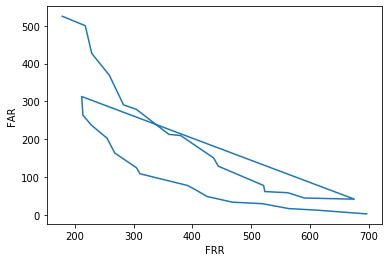

In [39]:
#2. train subject , new subject

counter_true_false_result(0,89, 90,108)
plt.plot(list_FRR, list_FAR )
plt.xlabel('FRR') 
plt.ylabel('FAR') 
#plt.legend()
plt.show()

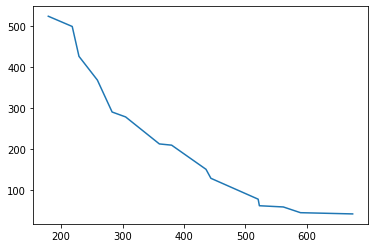

In [44]:
plt.plot(list_FRR[15:], list_FAR[15:] )


50 
 75.725 
 3029 971 
 920 51 
 

52 
 76.675 
 3067 933 
 835 98 
 

54 
 76.4 
 3056 944 
 826 118 
 

56 
 76.875 
 3075 925 
 760 165 
 

58 
 78.85 
 3154 846 
 643 203 
 

60 
 77.925 
 3117 883 
 649 234 
 

62 
 77.6 
 3104 896 
 599 297 
 

64 
 77.0 
 3080 920 
 559 361 
 

66 
 77.3 
 3092 908 
 482 426 
 

68 
 75.925 
 3037 963 
 477 486 
 

70 
 75.575 
 3023 977 
 431 546 
 

72 
 74.925 
 2997 1003 
 384 619 
 

74 
 73.375 
 2935 1065 
 369 696 
 

76 
 71.75 
 2870 1130 
 330 800 
 

78 
 69.4 
 2776 1224 
 320 904 
 



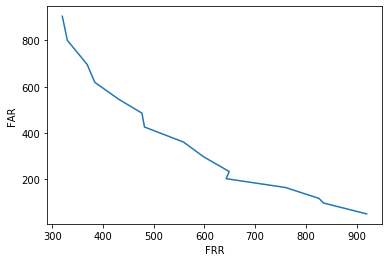

In [47]:
#3. new subject , new subject

counter_true_false_result(90,108, 90,108)
plt.plot(list_FRR, list_FAR )
plt.xlabel('FRR') 
plt.ylabel('FAR') 
#plt.legend()
plt.show()

50 
 81.65 
 3266 734 
 715 19 
 

52 
 81.975 
 3279 721 
 694 27 
 

54 
 82.675 
 3307 693 
 657 36 
 

56 
 84.95 
 3398 602 
 551 51 
 

58 
 85.65 
 3426 574 
 513 61 
 

60 
 86.15 
 3446 554 
 473 81 
 

62 
 87.675 
 3507 493 
 407 86 
 

64 
 86.825 
 3473 527 
 402 125 
 

66 
 87.075 
 3483 517 
 362 155 
 

68 
 87.15 
 3486 514 
 303 211 
 

70 
 87.5 
 3500 500 
 297 203 
 

72 
 85.975 
 3439 561 
 288 273 
 

74 
 85.55 
 3422 578 
 249 329 
 

76 
 85.4 
 3416 584 
 232 352 
 

78 
 84.425 
 3377 623 
 222 401 
 



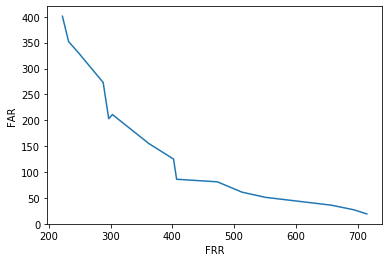

In [17]:
#4. all subject , all subject

counter_true_false_result(0,108, 0,108)
plt.plot(list_FRR, list_FAR )
plt.xlabel('FRR') 
plt.ylabel('FAR') 
#plt.legend()
plt.show()